## **0. Nh·∫≠p th∆∞ vi·ªán (Import Libary)** 

**M·ª•c ti√™u:**
ƒêo·∫°n code n√†y chu·∫©n b·ªã m√¥i tr∆∞·ªùng ƒë·ªÉ:

1. **X·ª≠ l√Ω d·ªØ li·ªáu**

   * S·ª≠ d·ª•ng `pandas` v√† `numpy` ƒë·ªÉ ƒë·ªçc, x·ª≠ l√Ω v√† ph√¢n t√≠ch d·ªØ li·ªáu.
   * D√πng `re` ƒë·ªÉ ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n (lo·∫°i b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát, chu·∫©n h√≥a).

2. **Tr·ª±c quan h√≥a d·ªØ li·ªáu**

   * `matplotlib` v√† `seaborn` ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì th·ªëng k√™.
   * `WordCloud` ƒë·ªÉ t·∫°o ƒë√°m m√¢y t·ª´ cho ph√¢n t√≠ch t·∫ßn su·∫•t t·ª´ v·ª±ng.

3. **Ph√¢n t√≠ch t·∫ßn su·∫•t v√† ƒë·∫∑c tr∆∞ng vƒÉn b·∫£n**

   * `Counter` ƒë·ªÉ ƒë·∫øm t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´.
   * `CountVectorizer` ƒë·ªÉ chuy·ªÉn vƒÉn b·∫£n th√†nh ma tr·∫≠n ƒë·∫∑c tr∆∞ng (Bag-of-Words).

4. **Ch·ªçn ƒë·∫∑c tr∆∞ng & ki·ªÉm ƒë·ªãnh th·ªëng k√™**

   * `mutual_info_classif` ƒë·ªÉ ch·ªçn ƒë·∫∑c tr∆∞ng quan tr·ªçng d·ª±a tr√™n th√¥ng tin t∆∞∆°ng h·ªó.
   * `chi2_contingency` ƒë·ªÉ ki·ªÉm ƒë·ªãnh Chi-square gi·ªØa bi·∫øn ph√¢n lo·∫°i v√† ƒë·∫∑c tr∆∞ng.
   * `ttest_ind` ƒë·ªÉ so s√°nh trung b√¨nh gi·ªØa hai nh√≥m.
   * `shapiro` ƒë·ªÉ ki·ªÉm ƒë·ªãnh ph√¢n ph·ªëi chu·∫©n c·ªßa d·ªØ li·ªáu.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, ttest_ind, shapiro

In [ ]:
df = pd.read_csv('../data/data.csv')

## **1. Ki·ªÉm tra c·∫•u tr√∫c d·ªØ li·ªáu (Data Structure Inspection)**

**M·ª•c ti√™u:** Hi·ªÉu s∆° b·ªô v·ªÅ k√≠ch th∆∞·ªõc v√† lo·∫°i d·ªØ li·ªáu.
**K·∫øt qu·∫£ tr√™n d·ªØ li·ªáu c·ªßa em:**

* Shape: (5842, 2) ‚Üí 5.842 b·∫£n ghi, 2 c·ªôt.
* Dtypes: `Sentence` (object ‚Äì text), `Sentiment` (object ‚Äì label).
* Sample 5 d√≤ng ƒë·∫ßu ƒë·ªÉ ki·ªÉm tra d·ªØ li·ªáu c√≥ ƒë√∫ng ƒë·ªãnh d·∫°ng.

---


In [ ]:
text_col = "Sentence"
target_col = "Sentiment"

# ======================
# 1) Ki·ªÉm tra c·∫•u tr√∫c d·ªØ li·ªáu
# ======================
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nSample:\n", df.head())

Shape: (5842, 2)

Dtypes:
 Sentence     object
Sentiment    object
dtype: object

Sample:
                                             Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


## **2. Th·ªëng k√™ m√¥ t·∫£ (Descriptive Statistics)**

**M·ª•c ti√™u:** Bi·∫øt ƒë∆∞·ª£c c√°c gi√° tr·ªã th∆∞·ªùng g·∫∑p, t·∫ßn su·∫•t, m·ª©c ƒë·ªô ƒëa d·∫°ng.
**K·∫øt qu·∫£:**

* `Sentiment` c√≥ 3 nh√£n: Neutral (54%), Positive (32%), Negative (14%).
* Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu (`NaN`) ·ªü c·∫£ hai c·ªôt.

---


In [4]:
# ======================
# 2) Th·ªëng k√™ m√¥ t·∫£
# ======================
print("\nDescribe (categorical):\n", df[target_col].value_counts())
print("\nUnique values in target:", df[target_col].unique())


Describe (categorical):
 Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

Unique values in target: ['positive' 'negative' 'neutral']



## **3. Ph√¢n t√≠ch ph√¢n ph·ªëi d·ªØ li·ªáu (Distribution Analysis)**

**M·ª•c ti√™u:** Ki·ªÉm tra d·ªØ li·ªáu target v√† feature.
**K·∫øt qu·∫£:**

* Bi·ªÉu ƒë·ªì countplot cho th·∫•y d·ªØ li·ªáu **m·∫•t c√¢n b·∫±ng** (imbalanced dataset).
* V·ªõi text, c√≥ th·ªÉ ki·ªÉm tra ph√¢n ph·ªëi ƒë·ªô d√†i c√¢u, t·∫ßn su·∫•t t·ª´.

---




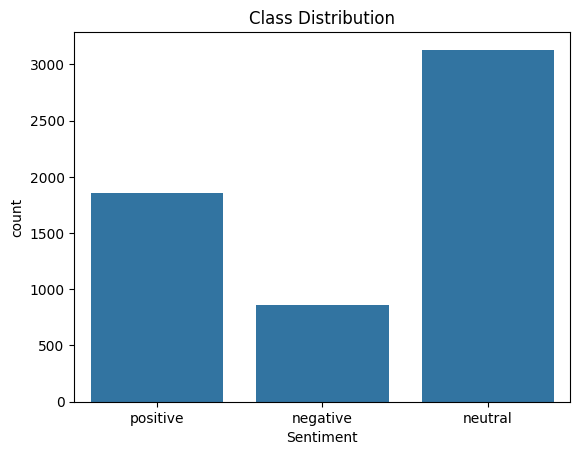

In [ ]:
# ======================
# 3) Ph√¢n t√≠ch ph√¢n ph·ªëi d·ªØ li·ªáu
# ======================
plt.figure()
sns.countplot(x=target_col, data=df)
plt.title("Class Distribution")
plt.show()

## **4. Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu (Missing Values)**

**M·ª•c ti√™u:** Ph√°t hi·ªán gi√° tr·ªã null v√† quy·∫øt ƒë·ªãnh x·ª≠ l√Ω.
**K·∫øt qu·∫£:** 0 missing value ‚Üí kh√¥ng c·∫ßn imputation.

---



In [ ]:
# ======================
# 4) Missing values
# ======================
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 Sentence     0
Sentiment    0
dtype: int64


## **5. Ph√°t hi·ªán d·ªØ li·ªáu ngo·∫°i lai (Outlier Detection)**

**M·ª•c ti√™u:** X√°c ƒë·ªãnh c√°c c√¢u qu√° d√†i/ng·∫Øn b·∫•t th∆∞·ªùng.
**K·∫øt qu·∫£:**

* Outliers v·ªÅ ƒë·ªô d√†i c√¢u (text\_len) = 71 c√¢u > 50 t·ª´, c√≥ c√¢u t·ªõi 80+ t·ª´.
* C√≥ th·ªÉ xem x√©t c·∫Øt ho·∫∑c gi·ªØ nguy√™n t√πy b·ªëi c·∫£nh.

---




Outliers based on text length: 71


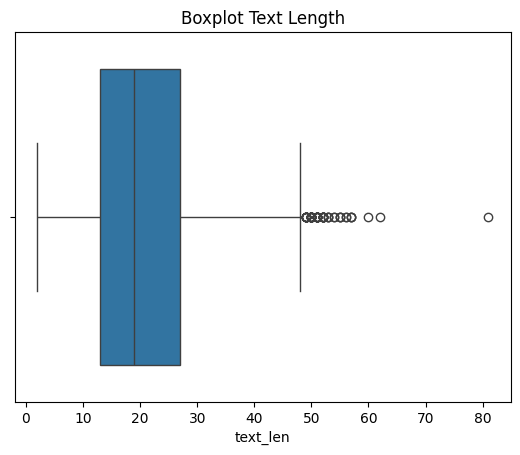

In [ ]:
# ======================
# 5) Ph√°t hi·ªán outliers (v·ªõi text c√≥ th·ªÉ d·ª±a v√†o ƒë·ªô d√†i c√¢u)
# ======================
df["text_len"] = df[text_col].apply(lambda x: len(str(x).split()))
q1, q3 = df["text_len"].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
outliers = df[(df["text_len"] < lower) | (df["text_len"] > upper)]
print(f"\nOutliers based on text length: {len(outliers)}")

plt.figure()
sns.boxplot(x="text_len", data=df)
plt.title("Boxplot Text Length")
plt.show()

## **6. Ki·ªÉm tra t√≠nh c√¢n b·∫±ng d·ªØ li·ªáu (Class Balance)**

**M·ª•c ti√™u:** Xem t·ª∑ l·ªá c√°c nh√£n target.
**K·∫øt qu·∫£:** Negative ch·ªâ chi·∫øm 14% ‚Üí c·∫ßn x·ª≠ l√Ω imbalance khi train.

---



In [ ]:
# ======================
# 6) Ki·ªÉm tra c√¢n b·∫±ng d·ªØ li·ªáu
# ======================
print("\nClass ratio:\n", df[target_col].value_counts(normalize=True))


Class ratio:
 Sentiment
neutral     0.535775
positive    0.317015
negative    0.147210
Name: proportion, dtype: float64


## **7. Ph√¢n t√≠ch t∆∞∆°ng quan (Correlation Analysis)**

**M·ª•c ti√™u:** T√¨m t·ª´/c·ª•m t·ª´ ·∫£nh h∆∞·ªüng m·∫°nh t·ªõi nh√£n.
**K·∫øt qu·∫£:**

* MI (Mutual Information) top t·ª´ li√™n quan: `fell` (negative), `rose` (positive), `profit` (positive), `products`, `chairman`‚Ä¶

---

In [ ]:
# ======================
# 7) T∆∞∆°ng quan (·ªü ƒë√¢y target l√† categorical, d√πng mutual information)
# Chuy·ªÉn text th√†nh Bag-of-Words (s·ªë feature s·∫Ω nhi·ªÅu)
# ======================
vectorizer = CountVectorizer(max_features=500, stop_words='english')
X_bow = vectorizer.fit_transform(df[text_col]).toarray()
mi = mutual_info_classif(X_bow, df[target_col])
mi_scores = pd.Series(mi, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)
print("\nTop 10 t·ª´ li√™n quan m·∫°nh t·ªõi target:\n", mi_scores.head(10))


Top 10 t·ª´ li√™n quan m·∫°nh t·ªõi target:
 fell        0.022774
rose        0.022587
small       0.020597
number      0.020578
chairman    0.018054
earlier     0.017636
products    0.016347
profit      0.016087
daily       0.016001
38          0.015796
dtype: float64


## **8. M·ªëi quan h·ªá gi·ªØa bi·∫øn ƒë·ªôc l·∫≠p v√† m·ª•c ti√™u**

**M·ª•c ti√™u:** Ki·ªÉm tra li·ªáu m·ªôt ƒë·∫∑c tr∆∞ng numeric c√≥ ph√¢n bi·ªát ƒë∆∞·ª£c c√°c nh√£n.
**K·∫øt qu·∫£:**

* Boxplot `text_len` theo sentiment cho th·∫•y ƒë·ªô d√†i trung b√¨nh t∆∞∆°ng ƒë·ªëi gi·ªëng nhau ‚Üí kh√¥ng ƒë·ªß ph√¢n bi·ªát.

---



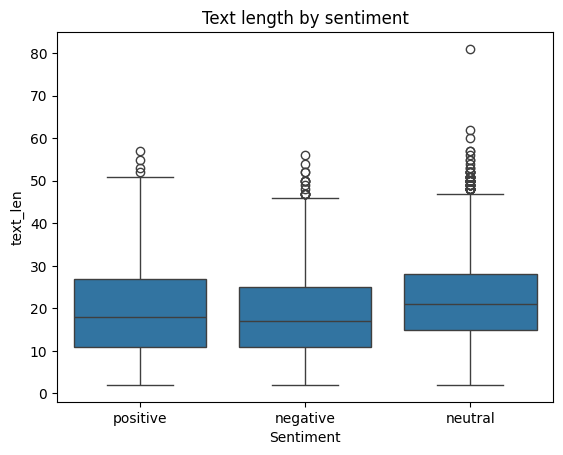

In [ ]:
# ======================
# 8) M·ªëi quan h·ªá feature ‚Üî target (·ªü ƒë√¢y: length vs sentiment)
# ======================
plt.figure()
sns.boxplot(x=target_col, y="text_len", data=df)
plt.title("Text length by sentiment")
plt.show()

## **9. Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng th·ªëng k√™ cho text**

**M·ª•c ti√™u:** T·∫°o th√™m feature numeric ƒë·ªÉ h·ªó tr·ª£ model.
**K·∫øt qu·∫£:**

* `char_count`, `word_count`, `avg_word_len` t√≠nh t·ª´ Sentence.
* C√≥ th·ªÉ k·∫øt h·ª£p v·ªõi TF-IDF khi train.

---




Text stats sample:
    char_count  word_count  avg_word_len
0         218          32      6.812500
1          55          11      5.000000
2         193          39      4.948718
3         128          20      6.400000
4         135          23      5.869565


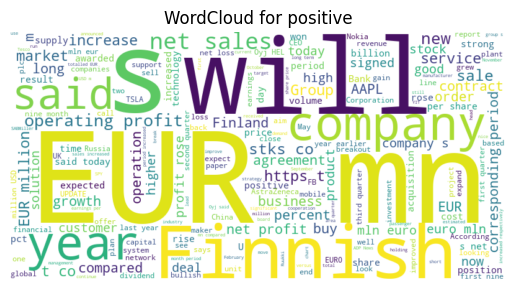

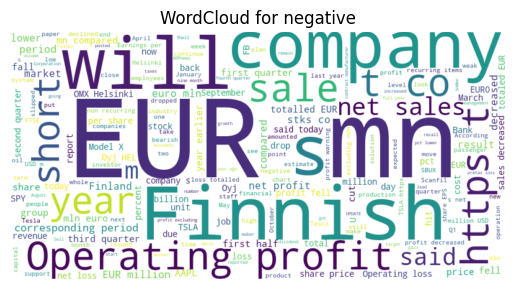

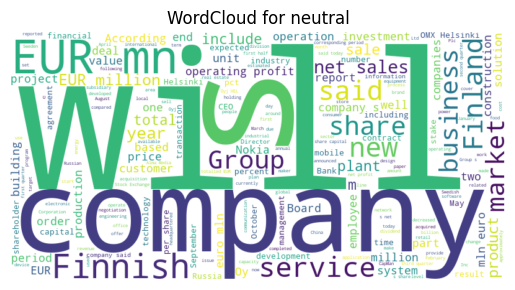

In [ ]:
# ======================
# 9) Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng th·ªëng k√™ cho text
# ======================
df["char_count"] = df[text_col].apply(len)
df["word_count"] = df[text_col].apply(lambda x: len(str(x).split()))
df["avg_word_len"] = df["char_count"] / df["word_count"]
print("\nText stats sample:\n", df[["char_count","word_count","avg_word_len"]].head())

# WordCloud theo t·ª´ng sentiment
for label in df[target_col].unique():
    text = " ".join(df[df[target_col]==label][text_col].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {label}")
    plt.show()

## **10. Ki·ªÉm tra d·ªØ li·ªáu tr√πng l·∫∑p (Duplicates)**

**M·ª•c ti√™u:** Tr√°nh model h·ªçc l·∫∑p th√¥ng tin.
**K·∫øt qu·∫£:** 6 b·∫£n ghi tr√πng ‚Üí n√™n x√≥a tr∆∞·ªõc khi train.

---

In [ ]:
# ======================
# 10) Duplicates
# ======================
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 6


## **11. Chu·∫©n h√≥a & bi·∫øn ƒë·ªïi d·ªØ li·ªáu (Data Transformation)**

**M·ª•c ti√™u:** L√†m s·∫°ch text ƒë·ªÉ vector h√≥a t·ªët h∆°n.
**Thao t√°c ƒë√£ l√†m:** lowercase, b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát (`re.sub(r"[^\w\s]", "", text)`).

---

In [ ]:
# ======================
# 11) Chu·∫©n h√≥a & bi·∫øn ƒë·ªïi d·ªØ li·ªáu (minh h·ªça: lowercase + remove punctuation)
# ======================
df["text_clean"] = df[text_col].apply(lambda x: re.sub(r"[^\w\s]", "", str(x).lower()))

## **12. Ph√¢n t√≠ch ƒëa bi·∫øn (Multivariate Analysis)**

**M·ª•c ti√™u:** Quan s√°t quan h·ªá gi·ªØa nhi·ªÅu ƒë·∫∑c tr∆∞ng numeric.
**K·∫øt qu·∫£:** Pairplot cho th·∫•y `char_count` v√† `word_count` t∆∞∆°ng quan r·∫•t m·∫°nh ‚Üí ch·ªâ c·∫ßn gi·ªØ 1.

---

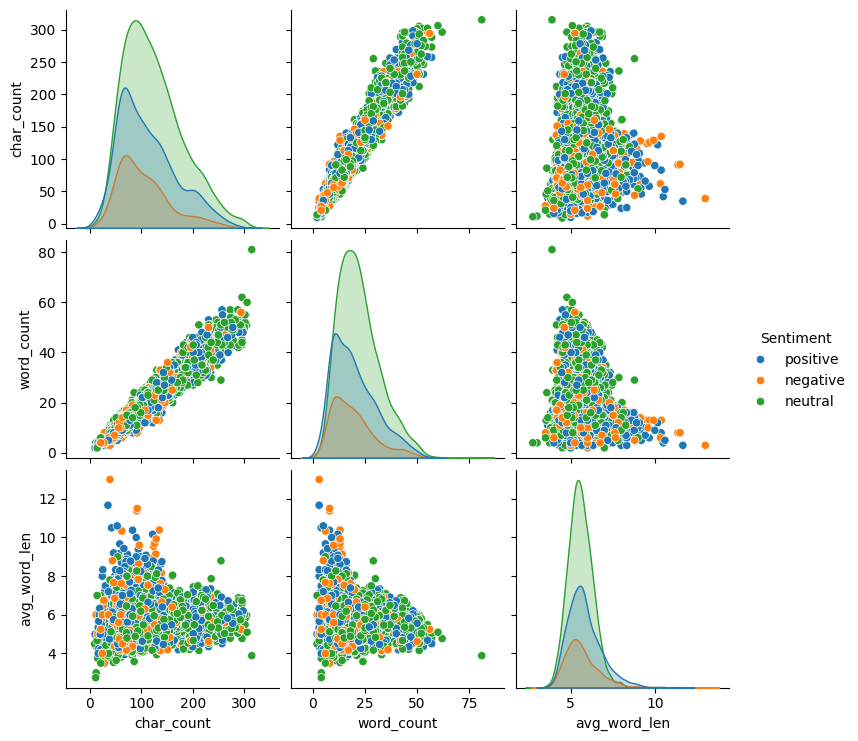

In [15]:
# ======================
# 12) Ph√¢n t√≠ch ƒëa bi·∫øn (pairplot v·ªõi features s·ªë)
sns.pairplot(df[[target_col, "char_count", "word_count", "avg_word_len"]], hue=target_col)
plt.show()

## **13. Ki·ªÉm ƒë·ªãnh gi·∫£ thuy·∫øt th·ªëng k√™ (Statistical Hypothesis Testing)**

**M·ª•c ti√™u:** Xem s·ª± kh√°c bi·ªát gi·ªØa nh√≥m c√≥ √Ω nghƒ©a th·ªëng k√™ kh√¥ng.
**K·∫øt qu·∫£:**

* T-test gi·ªØa ƒë·ªô d√†i Positive v√† Negative ‚Üí p-value = 0.1343 (>0.05) ‚Üí kh√¥ng c√≥ kh√°c bi·ªát ƒë√°ng k·ªÉ.

---

In [22]:
# ======================
# 13) Ki·ªÉm ƒë·ªãnh gi·∫£ thuy·∫øt (VD: T-test ƒë·ªô d√†i gi·ªØa pos vs neg)
pos_len = df[df[target_col]=="positive"]["text_len"]
neg_len = df[df[target_col]=="negative"]["text_len"]
stat, p = ttest_ind(pos_len, neg_len, equal_var=False)
print(f"\nT-test pos vs neg text length: p-value={p:.4f}")


T-test pos vs neg text length: p-value=0.1343


## **15. ƒê√°nh gi√° ƒë·ªô quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng (Feature Importance)**

**M·ª•c ti√™u:** X√°c ƒë·ªãnh c√°c t·ª´ quan tr·ªçng nh·∫•t trong ph√¢n lo·∫°i sentiment.
**K·∫øt qu·∫£:**

* RF top features: `rose`, `https`, `increased`, `stks`, `eur`, `buy`‚Ä¶

---

In [17]:
# ======================
# 14) Feature importance (quick RF tr√™n BoW)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_bow, df[target_col])
importances = pd.Series(rf.feature_importances_, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)
print("\nTop 10 feature importance RF:\n", importances.head(10))


Top 10 feature importance RF:
 rose         0.015507
https        0.014914
increased    0.011028
stks         0.009830
eur          0.009714
http         0.009295
increase     0.008951
year         0.008643
long         0.008499
buy          0.008280
dtype: float64


## **15. Ph√¢n t√≠ch c√°c outlier c·ª• th·ªÉ (Outlier Profiling)**

**M·ª•c ti√™u:** Hi·ªÉu nguy√™n nh√¢n d·ªØ li·ªáu b·∫•t th∆∞·ªùng.
**K·∫øt qu·∫£:**

* C√°c c√¢u d√†i th∆∞·ªùng l√† m√¥ t·∫£ chi ti·∫øt ho·∫∑c b√°o c√°o doanh nghi·ªáp ‚Üí c√≥ th·ªÉ gi·ªØ l·∫°i v√¨ ch·ª©a nhi·ªÅu th√¥ng tin.

---


In [18]:
# ======================
# 15) Outlier profiling (in c√°c c√¢u d√†i b·∫•t th∆∞·ªùng)
print("\nSample long outliers:\n", outliers[[text_col, "text_len"]].head())


Sample long outliers:
                                               Sentence  text_len
84   Dealers said the share was largely hit by inve...        54
109  Finnish Exel Composites , a technology company...        52
137  Finnish technology group Aspocomp Group Oyj ( ...        49
267  The plant is scheduled for completion in late ...        50
405  ( ADPnews ) - May 4 , 2010 - Finnish cutlery a...        50


## **16. Ki·ªÉm tra t√≠nh ƒëa c·ªông tuy·∫øn (Multicollinearity)**

**M·ª•c ti√™u:** Ph√°t hi·ªán feature numeric b·ªã tr√πng l·∫∑p th√¥ng tin.
**K·∫øt qu·∫£:**

* VIF: `char_count` = 81, `word_count` = 69 ‚Üí r·∫•t cao, n√™n gi·ªØ 1 ƒë·ªÉ tr√°nh overfitting.

In [19]:
# ======================
# 16) Multicollinearity (VIF cho numeric features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_feats = df[["char_count","word_count","avg_word_len"]]
vif_df = pd.DataFrame()
vif_df["feature"] = num_feats.columns
vif_df["VIF"] = [variance_inflation_factor(num_feats.values, i) for i in range(num_feats.shape[1])]
print("\nVIF:\n", vif_df)


VIF:
         feature        VIF
0    char_count  81.129535
1    word_count  69.450308
2  avg_word_len   5.165892


## **<center> K·∫øt lu·∫≠n ƒë√°nh gi√° v·ªÅ Exploratory Data Analysis <center>**

## 1Ô∏è‚É£ Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng t·ª´ EDA ·∫£nh h∆∞·ªüng t·ªõi ch·ªçn m√¥ h√¨nh

T·ª´ k·∫øt qu·∫£ EDA, c√≥ m·ªôt s·ªë ƒë·∫∑c ƒëi·ªÉm then ch·ªët:

1. **D·ªØ li·ªáu d·∫°ng text ng·∫Øn (c√¢u b√°o t√†i ch√≠nh)** ‚Üí ƒë·∫ßu v√†o t·ªët cho vector h√≥a (TF-IDF, Word2Vec, BERT embedding‚Ä¶).
2. **S·ªë l∆∞·ª£ng d·ªØ li·ªáu trung b√¨nh (\~5.8k c√¢u)** ‚Üí ƒë·ªß ƒë·ªÉ train m√¥ h√¨nh ML truy·ªÅn th·ªëng, nh∆∞ng v·ªõi DL c·∫ßn c·∫©n th·∫≠n ƒë·ªÉ tr√°nh overfitting.
3. **S·ªë class = 3, imbalance r√µ (54%-32%-14%)** ‚Üí c·∫ßn x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng (class\_weight ho·∫∑c oversampling).
4. **Ng√¥n ng·ªØ ti·∫øng Anh chuy√™n ng√†nh t√†i ch√≠nh** ‚Üí t·ª´ v·ª±ng c√≥ t√≠nh ƒë·∫∑c th√π, nhi·ªÅu proper noun, ƒë∆°n v·ªã ti·ªÅn t·ªá, k√Ω hi·ªáu.
5. **ƒê·ªô d√†i c√¢u ƒëa ph·∫ßn ng·∫Øn/trung b√¨nh (\~20 t·ª´)** ‚Üí m√¥ h√¨nh kh√¥ng c·∫ßn x·ª≠ l√Ω vƒÉn b·∫£n d√†i (sequence length v·ª´a ph·∫£i).
6. **C√≥ nhi·ªÅu t·ª´ quan tr·ªçng quy·∫øt ƒë·ªãnh sentiment** (fell, rose, profit, etc.) ‚Üí TF-IDF ho·∫∑c embedding c√≥ th·ªÉ gi·ªØ ƒë∆∞·ª£c t√≠n hi·ªáu m·∫°nh.

---

## 2Ô∏è‚É£ M√¥ h√¨nh Machine Learning ph√π h·ª£p

| M√¥ h√¨nh                                                   | L√Ω do ch·ªçn                                                                                  | ƒêi·ªÉm m·∫°nh                                                      | ƒêi·ªÉm y·∫øu / L∆∞u √Ω                                                              |
| --------------------------------------------------------- | ------------------------------------------------------------------------------------------- | -------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Logistic Regression** (v·ªõi TF-IDF)                      | Kinh ƒëi·ªÉn cho text classification, nhanh, d·ªÖ train, √≠t overfit n·∫øu d√πng regularization      | Gi·∫£i th√≠ch ƒë∆∞·ª£c tr·ªçng s·ªë t·ª´, hu·∫•n luy·ªán nhanh, baseline m·∫°nh   | Kh√¥ng m√¥ h√¨nh h√≥a t·ªët quan h·ªá t·ª´ xa (context)                                 |
| **Linear SVM (LinearSVC)**                                | T·ªët cho d·ªØ li·ªáu sparse (TF-IDF), m·∫°nh h∆°n Logistic Regression khi d·ªØ li·ªáu c√≥ margin r√µ r√†ng | T·ªët v·ªõi feature high-dimensional, ƒë·ªô ch√≠nh x√°c cao cho text    | Kh√≥ gi·∫£i th√≠ch k·∫øt qu·∫£, c·∫ßn x·ª≠ l√Ω imbalance qua class\_weight                 |
| **Multinomial Naive Bayes**                               | D√πng x√°c su·∫•t ƒëi·ªÅu ki·ªán, ch·∫°y r·∫•t nhanh, baseline c·ª±c nh·∫π                                   | R·∫•t nhanh, ph√π h·ª£p khi t√†i nguy√™n th·∫•p                         | Hi·ªáu su·∫•t k√©m h∆°n SVM/LR n·∫øu t·ª´ v·ª±ng ph·ª©c t·∫°p v√† ph·ª• thu·ªôc nhau               |
| **Random Forest/ Gradient Boosting** | Kh·∫£ nƒÉng h·ªçc phi tuy·∫øn t·ªët, k·∫øt h·ª£p TF-IDF ho·∫∑c feature th·ªëng k√™                            | M·∫°nh khi k·∫øt h·ª£p nhi·ªÅu feature ngo√†i text, ch·ªëng overfit t·ªët   | Kh√¥ng l√Ω t∆∞·ªüng n·∫øu ch·ªâ d√πng TF-IDF v√¨ high-dimensional, ch·∫≠m h∆°n linear model |

üìå **K·∫øt lu·∫≠n ML:**

* **Baseline n√™n d√πng**: Logistic Regression + TF-IDF, Linear SVM + TF-IDF.
* **N·∫øu mu·ªën tƒÉng th√™m**: XGBoost/CatBoost khi k·∫øt h·ª£p feature th·ªëng k√™.

---

## 3Ô∏è‚É£ M√¥ h√¨nh Deep Learning ph√π h·ª£p

| M√¥ h√¨nh                                                 | L√Ω do ch·ªçn                                                             | ƒêi·ªÉm m·∫°nh                                                                          | ƒêi·ªÉm y·∫øu / L∆∞u √Ω                                            |
| ------------------------------------------------------- | ---------------------------------------------------------------------- | ---------------------------------------------------------------------------------- | ----------------------------------------------------------- |
| **Bi-LSTM / Bi-GRU + Word Embedding (GloVe, FastText)** | D·ªØ li·ªáu ng·∫Øn, context quan tr·ªçng (t·ª´ ‚Äúrose‚Äù kh√°c ‚Äúrose from loss‚Äù)     | B·∫Øt ƒë∆∞·ª£c ng·ªØ c·∫£nh 2 chi·ªÅu, t·ªët cho c√¢u ng·∫Øn                                        | C·∫ßn embedding t·ªët, v·ªõi 5.8k c√¢u th√¨ d·ªÖ overfit n·∫øu model to |
| **TextCNN**                                             | C√¢u ng·∫Øn ‚Üí convolution filter b·∫Øt c·ª•m t·ª´ ƒë·∫∑c tr∆∞ng t·ªët                 | Nhanh, √≠t tham s·ªë h∆°n RNN, hi·ªáu qu·∫£ v·ªõi dataset v·ª´a                                | Kh√¥ng b·∫Øt ƒë∆∞·ª£c quan h·ªá d√†i h·∫°n                              |
| **Transformer-based (BERT, FinBERT)**                   | BERT pretrained tr√™n d·ªØ li·ªáu ti·∫øng Anh gi√∫p n·∫Øm context + chuy√™n ng√†nh | Hi·ªáu su·∫•t cao, ƒë·∫∑c bi·ªát khi fine-tune v·ªõi pre-trained model chuy√™n ng√†nh (FinBERT) | T·ªën t√†i nguy√™n, c·∫ßn c·∫©n th·∫≠n overfit v√¨ data size nh·ªè       |

üìå **K·∫øt lu·∫≠n DL:**

* N·∫øu GPU y·∫øu ‚Üí **TextCNN ho·∫∑c Bi-LSTM** l√† h·ª£p l√Ω.
* N·∫øu GPU t·ªët v√† mu·ªën state-of-the-art ‚Üí **Fine-tune FinBERT** (v√¨ d·ªØ li·ªáu t√†i ch√≠nh ti·∫øng Anh).
* Kh√¥ng n√™n train Transformer t·ª´ ƒë·∫ßu v√¨ data qu√° √≠t.

---

## 4Ô∏è‚É£ M√¥ h√¨nh kh√¥ng ph√π h·ª£p & l√Ω do

| M√¥ h√¨nh                              | L√Ω do kh√¥ng ph√π h·ª£p                                                     |
| ------------------------------------ | ----------------------------------------------------------------------- |
| **KNN**                              | Text high-dimensional ‚Üí t√≠nh kho·∫£ng c√°ch k√©m hi·ªáu qu·∫£, ch·∫≠m khi predict |
| **Decision Tree ƒë∆°n**                | Kh√¥ng x·ª≠ l√Ω t·ªët d·ªØ li·ªáu sparse t·ª´ TF-IDF, d·ªÖ overfit, accuracy th·∫•p     |
| **PCA + KMeans (unsupervised)**      | Kh√¥ng ph√π h·ª£p v√¨ ƒë√¢y l√† b√†i to√°n ph√¢n lo·∫°i supervised, label ƒë√£ c√≥      |
| **Deep LSTM nhi·ªÅu t·∫ßng t·ª´ ƒë·∫ßu**      | Data qu√° √≠t, d·ªÖ overfit, training l√¢u                                   |
| **Transformer t·ª´ ƒë·∫ßu (random init)** | C·∫ßn h√†ng trƒÉm ngh√¨n c√¢u ƒë·ªÉ h·ªçc t·ªët, dataset hi·ªán t·∫°i qu√° nh·ªè            |

